In [1]:
import json
import os

def GetFileNameList(filePath,dataType):
    fileList=[]
    allList = os.listdir(filePath)
    
    typeName=''
    if dataType == 'choice':
        typeName = 'choicedata.json'
    elif dataType == 'eye':
        typeName = 'eyedata'
    elif dataType == 'speak':
        typeName = 'speakdata.json'
    
    for name in allList:
        if typeName in name:
            fileList.append(name)
    
    print('------------file type:',typeName,' count:',len(fileList))
    return fileList

In [2]:
#对选择数据文件标准化
def FixChoiceRawData(path):
    p = "./MyDataset/"+path
    f = open(p,encoding='utf-8')
    setting = json.load(f)

    #标签数据标准化
    choiceData = setting['choiceData']
    for data in choiceData:
        x = data['time']
        data['time'] = round(x,5)
        if data['choiceType']== 304: #积极
            data['choiceType'] = 1
        elif data['choiceType'] ==305: #消极
            data['choiceType'] = -1
        else:
            data['choiceType'] = 0

    #提取选择数据特
    fixChoiceData = {}
    fixChoiceData["playerID"]=setting['playerID']

    choiceCount=0
    negCount=0
    posCount=0
    neuCount=0

    choiceTime=0
    negTime=0
    posTime=0
    neuTime=0

    for data in choiceData:
        choiceCount = choiceCount + 1
        choiceTime = choiceTime+data['time']
        if data['choiceType']==1:
            posCount=posCount+1
            posTime=posTime+data['time']
        elif data['choiceType']==0:
            neuCount=neuCount+1
            neuTime=neuTime+data['time']
        elif data['choiceType']==-1:
            negCount=negCount+1
            negTime=negTime+data['time']

    fixChoiceData['allCount']=choiceCount
    fixChoiceData['posCount']=round(posCount/choiceCount,5)
    fixChoiceData['neuCount']=round(neuCount/choiceCount,5)
    fixChoiceData['negCount']=round(negCount/choiceCount,5)
    fixChoiceData['allTime']=round(choiceTime,5)
    fixChoiceData['posTime']=round(posTime/choiceTime,5)
    fixChoiceData['neuTime']=round(neuTime/choiceTime,5)
    fixChoiceData['negTime']=round(negTime/choiceTime,5)

    print(path,': Choice Num:',choiceCount,' | Pos :',round(posCount/choiceCount,5),' | Neg :',round(negCount/choiceCount,5))
    return fixChoiceData

#获取原始选择数据文件
def getChoiceRawData(path):
    p = "./MyDataset/"+path
    f = open(p,encoding='utf-8')
    setting = json.load(f)

    #标签数据标准化
    choiceData = setting['choiceData']
    for data in choiceData:
        x = data['time']
        data['time'] = round(x,5)
        if data['choiceType']== 304: #积极
            data['choiceType'] = 1
        elif data['choiceType'] ==305: #消极
            data['choiceType'] = -1
        else:
            data['choiceType'] = 0
            
    rawData={}
    rawData['choiceData'] = choiceData.copy()
    rawData["playerID"]=setting['playerID']
    return rawData


In [3]:
#对每个眼动文件进行标准化
def FixEyeRawData(p):
    path = "./MyDataset/" + p
    f = open(path,encoding='utf-8')
    eyeDataSetting = json.load(f)

    fixEyeData={}
    playerID=eyeDataSetting['playerID']
    rawEyeData = eyeDataSetting['dataOfEachLevel']
  
    fixEyeData['playerID']=playerID
    i=0
    for eyeDataLevel in rawEyeData:
        levelname=eyeDataLevel['levelName']
    
        focusTime=0
        focusEnvTime=0
        focusPeoTime=0
        focusUITime=0

        jumpCount=0
        EnvPeo=0
        EnvUI=0
        PeoEnv=0
        PeoUI=0
        UIEnv=0
        UIPeo=0

        lastLabel=1
        i=i+1
        for data in eyeDataLevel['eyeDataSingleLevel']:
            focusTime=focusTime+1
            
            if abs(data['eyeFocusObjLabels']['firstLabels'][0])==4:
                focusPeoTime=focusPeoTime+1
            elif abs(data['eyeFocusObjLabels']['firstLabels'][0])==3:
                focusUITime=focusUITime+1 
            else:
                focusEnvTime=focusEnvTime+1
      
            if lastLabel!=abs(data['eyeFocusObjLabels']['firstLabels'][0]):
                jumpCount=jumpCount+1
                if abs(lastLabel)==3:
                    if data['eyeFocusObjLabels']['firstLabels'][0]==4:
                        UIPeo=UIPeo+1
                    else:
                        UIEnv=UIEnv+1
                elif abs(lastLabel)==4:
                    if data['eyeFocusObjLabels']['firstLabels'][0]==3:
                        PeoUI=PeoUI+1
                    else:
                        PeoEnv=PeoEnv+1
                else:
                    if data['eyeFocusObjLabels']['firstLabels'][0]==3:
                        EnvUI=EnvUI+1
                    elif data['eyeFocusObjLabels']['firstLabels'][0]==4:
                        EnvPeo=EnvPeo+1
            lastLabel = abs(data['eyeFocusObjLabels']['firstLabels'][0])
            
        #name = 'levelName'+str(i)
        #fixEyeData[name]=levelname
        name = 'focusTime'+str(i)
        fixEyeData[name]=focusTime
        name = 'focusEnvTime'+str(i)
        fixEyeData[name]=focusEnvTime/focusTime
        name = 'focusPeoTime'+str(i)
        fixEyeData[name]=focusPeoTime/focusTime
        name = 'focusUITime'+str(i)
        fixEyeData[name]=focusUITime/focusTime
    
        name = 'jumpCount'+str(i)
        fixEyeData[name]=jumpCount
        name = 'EnvPeo'+str(i)
        fixEyeData[name]=round(EnvPeo/jumpCount,5)
        name = 'EnvUI'+str(i)
        fixEyeData[name]=round(EnvUI/jumpCount,5)
        name = 'PeoEnv'+str(i)
        fixEyeData[name]=round(PeoEnv/jumpCount,5)
        name = 'PeoUI'+str(i)
        fixEyeData[name]=round(PeoUI/jumpCount,5)
        name = 'UIEnv'+str(i)
        fixEyeData[name]=round(UIEnv/jumpCount,5)
        name = 'UIPeo'+str(i)
        fixEyeData[name]=round(UIPeo/jumpCount,5)
  
    print('--',path,'---- level num:',len(fixEyeData))
    return fixEyeData

In [4]:
#语音文件标准化处理
def FixSpeakData(p):
    path = "./MyDataset/" + p
    f = open(path,encoding='utf-8')
    speakDataSetting = json.load(f)
    
    voiceData = speakDataSetting['voiceData']
    
    speakData={}
    speakData['playerID']=speakDataSetting['playerID']
    
    #时间
    speakData['time'] = len(voiceData)*0.05
    #最终进度
    speakData['process'] = voiceData[len(voiceData)-1]['progress']
    
    volume=[]
    
    stopTime=0
    stopCount=0
    temp=0
    for data in voiceData:
        if data['volume']>2 or len(volume)>0:
            volume.append(data['volume'])
        
        if data['volume']>2:
            if temp>=20:
                stopTime=temp+stopTime
                stopCount=stopCount+1
            temp=0
        else:
            temp=temp+1
    
    speakData['stopTime']=stopTime*0.05
    speakData['stopCount']=stopCount
    if stopCount!=0:
        speakData['stopMeanTime'] = round(stopTime*0.05/stopCount,5)
    else:
        speakData['stopMeanTime'] = 0
    
    speakData['mean']=np.mean(volume)
    speakData['var']=np.var(volume,ddof = 1)
    
    return speakData

#对标准值进行校准
def ProcessSpeakData(speakRawList,speakStandardList):
    dataList=[]
    for rawData in speakRawList:
        id = rawData['playerID']
        rawMean = rawData['mean']
        rawVar =  rawData['var']
        meanRate=0
        varRate=0
        for standardData in speakStandardList:
            if standardData['playerID'] == id:
                meanRate = round(rawMean/standardData['mean'],5)
                varRate = round(rawVar/standardData['var'],5)
                speakData = rawData.copy()
                speakData['standardMean'] = standardData['mean']
                speakData['meanRate'] = meanRate
                speakData['standardVar'] = standardData['var']
                speakData['varRate'] = varRate
                dataList.append(speakData)
                print('-----ID:',id,' | stop Count:',speakData['stopCount'],' | stopMeanTime:',meanRate)
                break
    
    print('-----processed speak data count:',len(dataList))
    return dataList

In [5]:

#获取所有选择数据
def GetAllFixChoiceData(nameList):
    choiceDataList=[]
    for name in nameList:
        data = FixChoiceRawData(name)
        choiceDataList.append(data)
    return choiceDataList

#获取所有眼动数据
def GetAllFixEyeData(nameList):
    dataList=[]
    for name in nameList:
        data = FixEyeRawData(name)
        dataList.append(data)
    return dataList

#获取所有语音数据
def GetAllFixSpeakData(nameList):
    speakStandardList=[]
    speakRawList=[]
    #分离校准数据与正式数据
    for name in nameList:
        if 'standard' in name:
            data = FixSpeakData(name)
            speakStandardList.append(data)
        else:
            data = FixSpeakData(name)
            speakRawList.append(data)
            
    finalData = ProcessSpeakData(speakRawList,speakStandardList)
    return finalData

In [6]:
def GetKeyChoiceData(choiceFileList,keyChoiceList):
    #获取全部选择文件
    choiceDataList=[]
    for name in choiceFileList:
        data = getChoiceRawData(name)
        choiceDataList.append(data)

    keyChoiceData=[]
    for data in choiceDataList:
        keyChoice={}
        keyChoice['playerID'] = data['playerID']
        for choice in data['choiceData']:
            i = choice['inkID']
            q = choice['questionID']
            if keyChoiceList[i].count(q) == 1:
                key1 = str(i) +'-'+str(q)+'-value'
                key2 = str(i) +'-'+str(q)+'-time'
                keyChoice[key1] = choice['choiceType']
                keyChoice[key2] = round(choice['time'],5)
            elif keyChoiceList[i].count(q) > 1:
                print('!!!!warning, inkID:',i,' | questionID:',q,' count >1 !')
        
        keyChoiceData.append(keyChoice)
    return keyChoiceData


In [8]:
import pandas as pd
import numpy as np
rawDataFile = "./MyDataset/"

#保存选择数据
choiceFileList = GetFileNameList(rawDataFile,'choice')
allChoiceData = GetAllFixChoiceData(choiceFileList)
record = pd.DataFrame(allChoiceData)
record.to_csv('fixedChoiceData.csv',index=False,header=True)

#保存眼动数据
eyeFileList = GetFileNameList(rawDataFile,'eye')
allEyeData = GetAllFixEyeData(eyeFileList)
record = pd.DataFrame(allEyeData)
record.to_csv('fixedEyeData.csv',index=False,header=True)

#保存语音数据
speakFileList = GetFileNameList(rawDataFile,'speak')
allSpeakData = GetAllFixSpeakData(speakFileList)
record = pd.DataFrame(allSpeakData)
record.to_csv('fixedSpeakData.csv',index=False,header=True)

------------file type: choicedata.json  count: 37
A01_choicedata.json : Choice Num: 42  | Pos : 0.38095  | Neg : 0.38095
A02_choicedata.json : Choice Num: 32  | Pos : 0.71875  | Neg : 0.1875
A04_choicedata.json : Choice Num: 32  | Pos : 0.78125  | Neg : 0.15625
A05_choicedata.json : Choice Num: 34  | Pos : 0.61765  | Neg : 0.29412
A06_choicedata.json : Choice Num: 37  | Pos : 0.43243  | Neg : 0.32432
A07_choicedata.json : Choice Num: 36  | Pos : 0.58333  | Neg : 0.27778
A09_choicedata.json : Choice Num: 47  | Pos : 0.2766  | Neg : 0.46809
A10_choicedata.json : Choice Num: 42  | Pos : 0.40476  | Neg : 0.30952
A12_choicedata.json : Choice Num: 38  | Pos : 0.63158  | Neg : 0.23684
A17_choicedata.json : Choice Num: 39  | Pos : 0.53846  | Neg : 0.23077
A20_choicedata.json : Choice Num: 44  | Pos : 0.31818  | Neg : 0.43182
A25_choicedata.json : Choice Num: 46  | Pos : 0.26087  | Neg : 0.5
A28_choicedata.json : Choice Num: 32  | Pos : 0.6875  | Neg : 0.15625
C01_choicedata.json : Choice Num: 

In [9]:
#特殊选项数据
keyChoiceList={}
ink1=[1,4]
ink2=[2]
ink3=[1,3,5,6,7,8,9,11,13,16,17,18]
ink4=[1,2,5,6,7]
ink5=[1,4,5,6,7,8,9,11,13,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,35,34,36,37,38,39,40]
ink6=[1,2,3,6,7,8,9]
ink11=[]
ink12=[]

keyChoiceList[1]=ink1
keyChoiceList[2]=ink2
keyChoiceList[3]=ink3
keyChoiceList[4]=ink4
keyChoiceList[5]=ink5
keyChoiceList[6]=ink6
keyChoiceList[11]=ink11
keyChoiceList[12]=ink12
allkeyChoiceData = GetKeyChoiceData(choiceFileList,keyChoiceList)
record = pd.DataFrame(allkeyChoiceData)
record.to_csv('keyChoiceData.csv',index=False,header=True)

In [3]:
import pandas as pd
import numpy as np
#读取玩家数据
pd_reader = pd.read_csv('XData_eye.csv', encoding = 'utf8',header=0)
XData=pd_reader.values.tolist()

#读取玩家标签数据
pd_reader = pd.read_csv('yLabel.csv', encoding = 'utf8',header=0)
playerLabel=pd_reader.values.tolist()

In [107]:
import math
X=[]
y=[]

for data in XData:
    playerID = data[0]
    x = data[1:]
    ylabel=[]
    for label in playerLabel:
        if playerID == label[0]:
            ylabel.append(math.floor(label[6]/2))
            x.append(label[1])
            x.append(label[2])
            break
            
    if len(ylabel)>=1:
        X.append(x)
        y.append(ylabel)
        
print(len(X),len(X[0]),y)


37 31 [[1], [0], [0], [0], [1], [0], [1], [1], [0], [1], [0], [1], [0], [2], [1], [1], [1], [1], [2], [0], [1], [1], [1], [2], [0], [2], [1], [2], [1], [2], [0], [1], [1], [1], [1], [1], [1]]


In [4]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [6]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [10]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))


[14:18:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "weight" } are not used.

0.0


1.0

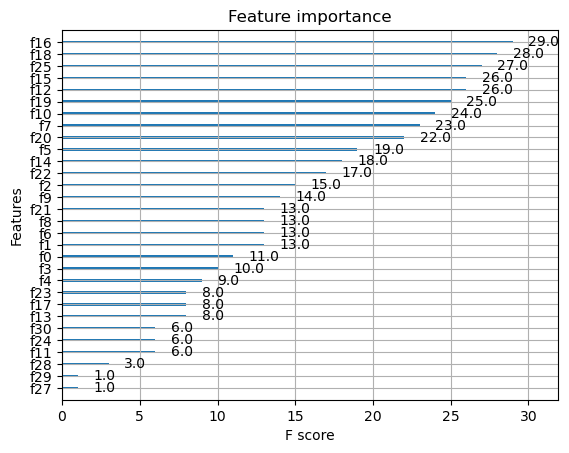

In [34]:
xgb.plot_importance(xgb_model)
xgb_model.score(X, y, sample_weight=None)

In [182]:
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

scores =[]

y1=[]
y2=[]
for train_index, test_index in kfold.split(X):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_test.append(X[i])
        y_test.append(y[i])
        
    xgb_model = xgb.XGBClassifier(objective="multi:softprob",booster='gbtree')
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X)
    print(xgb_model.score(X_test, y_test, sample_weight=None))
    scores.append(xgb_model.score(X_test, y_test, sample_weight=None))

print("---mean:",np.mean(scores))
    #print(confusion_matrix(y, y_pred))

0.625
0.5
0.8571428571428571
0.5714285714285714
0.5714285714285714
---mean: 0.625


In [176]:
def test_random( seed ):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

    scores =[]

    y1=[]
    y2=[]
    for train_index, test_index in kfold.split(X):
        X_train=[]
        X_test=[]
        y_train=[]
        y_test=[]
        for i in train_index:
            X_train.append(X[i])
            y_train.append(y[i])
        for i in test_index:
            X_test.append(X[i])
            y_test.append(y[i])
        
        xgb_model = xgb.XGBClassifier(objective="multi:softprob",booster='gbtree',gamma=0.1,colsample_bytree= 0.7,eta=0.007)
        xgb_model.fit(X_train, y_train)
    
        y_pred = xgb_model.predict(X)
        scores.append(xgb_model.score(X_test, y_test, sample_weight=None))
        #print(confusion_matrix(y, y_pred))
    if np.mean(scores)>=0.6:
        print("----seed:",seed,"---mean:",scores)
    return np.mean(scores)

In [177]:
test_random(30)
test_random(3)

----seed: 30 ---mean: [0.5, 0.75, 0.7142857142857143, 0.5714285714285714, 0.8571428571428571]
----seed: 3 ---mean: [0.875, 0.5, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143]


0.7035714285714286

In [178]:
maxmean=0
maxseed=0
for i in range(0,100):
    tmp = test_random(i)
    if tmp > maxmean :
        maxseed=i
        maxmean=tmp
print(maxseed,maxmean)

----seed: 1 ---mean: [0.75, 0.5, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143]
----seed: 3 ---mean: [0.875, 0.5, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143]
----seed: 4 ---mean: [0.75, 0.625, 0.5714285714285714, 0.42857142857142855, 0.8571428571428571]
----seed: 5 ---mean: [0.625, 0.75, 0.42857142857142855, 0.5714285714285714, 1.0]
----seed: 7 ---mean: [0.75, 0.875, 0.7142857142857143, 0.42857142857142855, 0.42857142857142855]
----seed: 13 ---mean: [0.5, 0.625, 0.8571428571428571, 0.8571428571428571, 0.2857142857142857]
----seed: 22 ---mean: [0.75, 0.25, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143]
----seed: 26 ---mean: [0.5, 0.625, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143]
----seed: 30 ---mean: [0.5, 0.75, 0.7142857142857143, 0.5714285714285714, 0.8571428571428571]
----seed: 31 ---mean: [0.75, 0.625, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714]
----seed: 42 ---mean: [0.5, 0.625, 0.8571428571428571, 0.7142857

In [18]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[ 5  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  6]]


ValueError: x and y must have same first dimension, but have shapes (23,) and (0,)

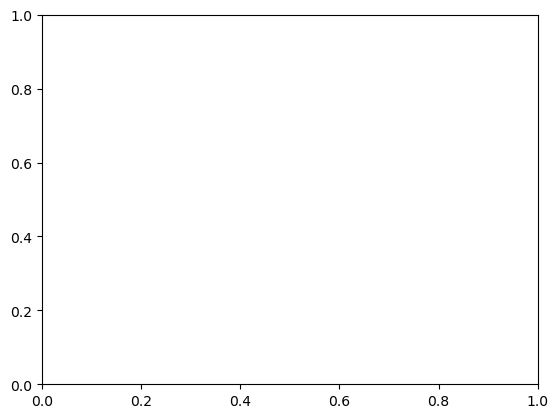

In [19]:
import matplotlib.pyplot as plt

xAxis = np.arange(0,23,1)


fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(xAxis,y1)

ax2 = ax1.twinx()
ax2.plot(xAxis,y2,'r')

plt.show()